In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h1 style="background-color: #bdbbbb; color: white; padding:10px">Conhecendo a base de dados</h1>

Base de dados com dados referentes a preços de aluguéis de diferentes imóveis do Rio de Janeiro, além de um quadro no trello com as demandas e atividades que precisamos realizar no decorrer do projeto.

In [7]:
dados = pd.read_csv('data/aluguel.csv', sep=';')
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0


In [12]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [15]:
dados['Tipo'] # pandas.core.series.Series

0                      Quitinete
1                           Casa
2        Conjunto Comercial/Sala
3                    Apartamento
4                    Apartamento
                  ...           
32955                  Quitinete
32956                Apartamento
32957                Apartamento
32958                Apartamento
32959    Conjunto Comercial/Sala
Name: Tipo, Length: 32960, dtype: object

In [18]:
dados[['Quartos', 'Valor']] # pandas.core.frame.DataFrame

,Quartos,Valor
0,1,1700.0
1,2,7000.0
2,0,5200.0
3,1,800.0
4,1,800.0
...,...,...
32955,0,800.0
32956,3,1800.0
32957,2,1400.0
32958,2,3000.0


<h2 style="background-color: gray; color: white;">EDA - Exploratory Data Analysis</h2>  

__Algumas perguntas que podemos fazer nesse momento:__  

1. Quais os valores médios de aluguel por tipo de imóvel?     
        
```python
 dados.groupby('Tipo')['Valor'].mean() 
```
Gera uma Series. Para gerar um DataFrame colocamos:  
```python
 dados.groupby('Tipo')[['Valor']].mean() 
```

2. Qual o percentual de cada tipo de imóvel na nossa base de dados?

In [37]:
# Agrupar os dados com base no tipo de imóvel.
df_precos_tipos = dados.groupby('Tipo')[['Valor']].mean(numeric_only=True).sort_values(by='Valor')
df_precos_tipos

,Valor
Tipo,
Quitinete,1246.840909
Pousada/Chalé,1480.000000
Casa de Vila,1574.369478
Box/Garagem,1899.756098
Studio,2400.000000
Loft,2557.882353
Flat,4546.189076
Apartamento,4744.614648
Chácara,4900.000000


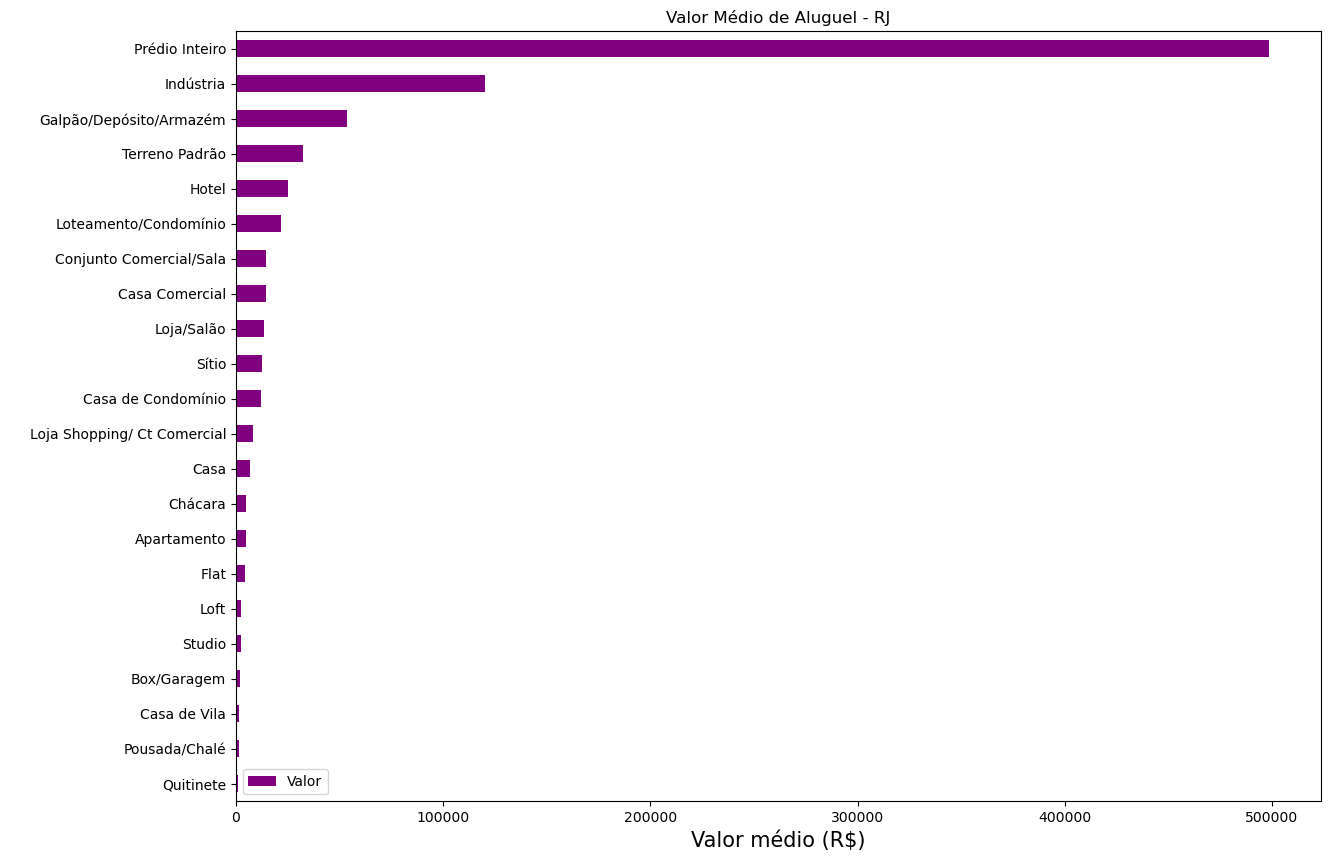

In [52]:
df_precos_tipos.plot(kind='barh', figsize=(14, 10), color='purple');
plt.title("Valor Médio de Aluguel - RJ")
plt.xlabel("Valor médio (R$)", fontsize=15)
plt.ylabel(" ");